##### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("../dataset/IDS_Dataset_processed.csv")

In [3]:
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215890 entries, 0 to 1215889
Data columns (total 48 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Seq               1215890 non-null  int64  
 1   Dur               1215890 non-null  float64
 2   sHops             1215890 non-null  float64
 3   dHops             1215890 non-null  float64
 4   TotPkts           1215890 non-null  int64  
 5   SrcPkts           1215890 non-null  int64  
 6   DstPkts           1215890 non-null  int64  
 7   TotBytes          1215890 non-null  int64  
 8   SrcBytes          1215890 non-null  int64  
 9   DstBytes          1215890 non-null  int64  
 10  Offset            1215890 non-null  int64  
 11  sMeanPktSz        1215890 non-null  float64
 12  dMeanPktSz        1215890 non-null  float64
 13  Load              1215890 non-null  float64
 14  SrcLoad           1215890 non-null  float64
 15  DstLoad           1215890 non-null  float64
 16  

##### Preprocess Data

In [4]:
numerical_cols= data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=[bool]).columns.tolist()

In [5]:
from sklearn.model_selection import train_test_split

# Let's assume 'Label__Malicious' is the target variable
X = data.drop(columns=["Label__Malicious"])
y = data["Label__Malicious"]

# First split into training and temp (temp will later be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split temp into validation and test sets (each 10% of the full dataset)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
# Suppose these are categorical columns:
categorical_cols = X_train.select_dtypes(include=[object]).columns.tolist()

# Create a dictionary to store the encoders for each column
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Fit on training data only
    X_train[col] = le.fit_transform(X_train[col])
    
    # Transform validation and test sets using the same encoder
    X_val[col] = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col])
    
    encoders[col] = le  # Save encoder if you need to transform new data later


In [7]:
# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [9]:
X_scaled = scaler.fit_transform(X.drop(columns=categorical_cols))


Fold 1


C:\Users\Satyam Gupta\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 0.9854 - loss: 0.0877 - val_accuracy: 0.9943 - val_loss: 0.0314
Epoch 2/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 25s 983us/step - accuracy: 0.9937 - loss: 0.0366 - val_accuracy: 0.9936 - val_loss: 0.0300
Epoch 3/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 25s 997us/step - accuracy: 0.9943 - loss: 0.0335 - val_accuracy: 0.9981 - val_loss: 0.0233
Epoch 4/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - accuracy: 0.9946 - loss: 0.0327 - val_accuracy: 0.9974 - val_loss: 0.0220
Epoch 5/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9948 - loss: 0.0311 - val_accuracy: 0.9972 - val_loss: 0.0230
Epoch 6/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9950 - loss: 0.0303 - val_accuracy: 0.9978 - val_loss: 0.0199
Epoch 7/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9948 - loss: 0.0307 - val_accuracy: 0.9982 - val_loss: 0.0212
Epoch 8/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 24s 962us/step - accu

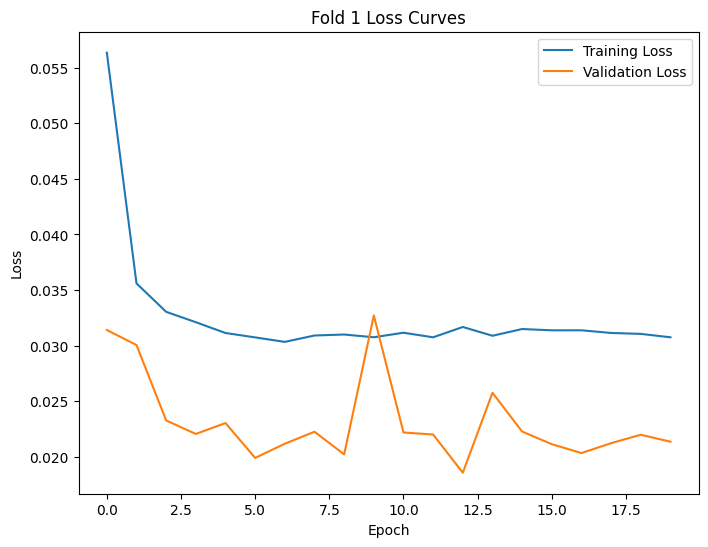


Fold 2
Epoch 1/20


C:\Users\Satyam Gupta\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25332/25332 ━━━━━━━━━━━━━━━━━━━━ 25s 952us/step - accuracy: 0.9845 - loss: 0.0917 - val_accuracy: 0.9968 - val_loss: 0.0284
Epoch 2/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 25s 989us/step - accuracy: 0.9938 - loss: 0.0366 - val_accuracy: 0.9979 - val_loss: 0.0233
Epoch 3/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9944 - loss: 0.0331 - val_accuracy: 0.9983 - val_loss: 0.0204
Epoch 4/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 24s 956us/step - accuracy: 0.9948 - loss: 0.0319 - val_accuracy: 0.9980 - val_loss: 0.0197
Epoch 5/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9947 - loss: 0.0328 - val_accuracy: 0.9976 - val_loss: 0.0213
Epoch 6/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - accuracy: 0.9948 - loss: 0.0306 - val_accuracy: 0.9968 - val_loss: 0.0217
Epoch 7/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 25s 997us/step - accuracy: 0.9947 - loss: 0.0335 - val_accuracy: 0.9984 - val_loss: 0.0207
Epoch 8/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 0.9

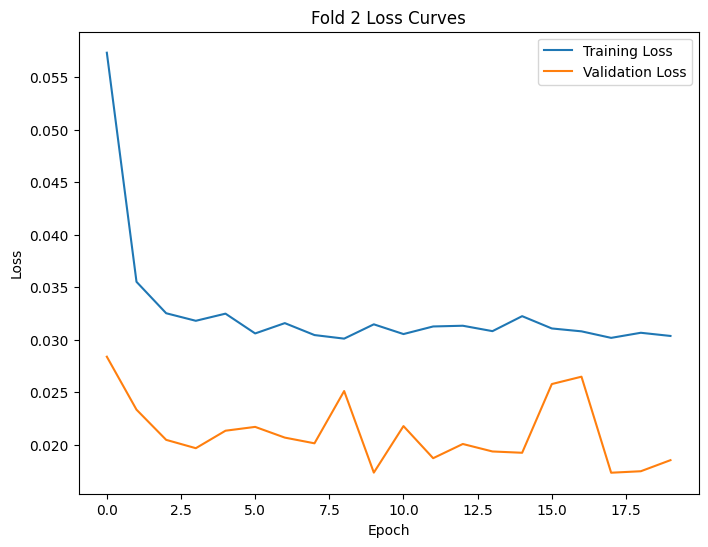


Fold 3
Epoch 1/20


C:\Users\Satyam Gupta\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25332/25332 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 0.9849 - loss: 0.0891 - val_accuracy: 0.9953 - val_loss: 0.0304
Epoch 2/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 24s 953us/step - accuracy: 0.9936 - loss: 0.0364 - val_accuracy: 0.9983 - val_loss: 0.0236
Epoch 3/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 25s 969us/step - accuracy: 0.9945 - loss: 0.0324 - val_accuracy: 0.9980 - val_loss: 0.0227
Epoch 4/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 24s 960us/step - accuracy: 0.9946 - loss: 0.0330 - val_accuracy: 0.9950 - val_loss: 0.0258
Epoch 5/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 24s 951us/step - accuracy: 0.9947 - loss: 0.0314 - val_accuracy: 0.9972 - val_loss: 0.0226
Epoch 6/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 24s 961us/step - accuracy: 0.9949 - loss: 0.0315 - val_accuracy: 0.9986 - val_loss: 0.0193
Epoch 7/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 25s 972us/step - accuracy: 0.9951 - loss: 0.0298 - val_accuracy: 0.9943 - val_loss: 0.0281
Epoch 8/20
25332/25332 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy:

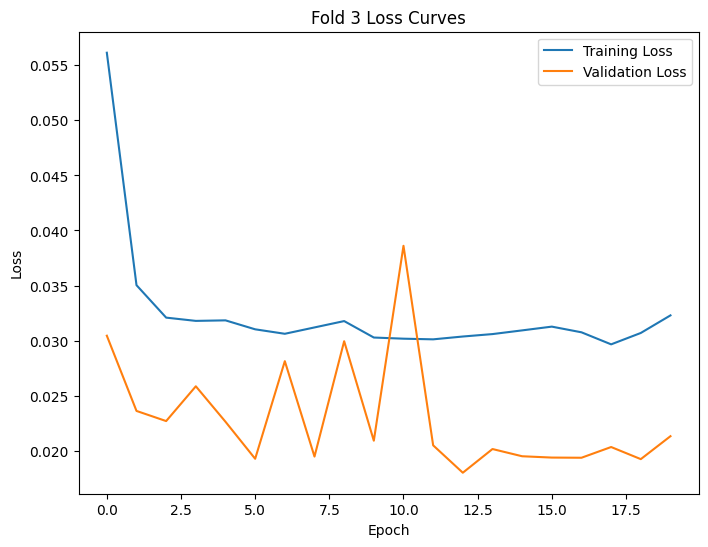

In [10]:
# Set Up 5-Fold Cross-Validation (No Sampling)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
fold_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_scaled, y), 1):
    print(f"\nFold {fold}")
    
    # Split data for this fold
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Neural Network Model with regularization:
    # - L2 regularization on Dense layers
    # - Dropout layers for additional regularization
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=l2(0.001), 
              input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # For binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model with validation_data set to the test set to track validation loss
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=20,
                        batch_size=32,
                        verbose=1)
    
    # Evaluate on the test set for this fold
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Fold {fold} Accuracy: {accuracy:.4f}")
    fold_scores.append(accuracy)
    
    # Plot the training and validation loss for this fold
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


##### Bringing everything together

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For feature selection
from sklearn.feature_selection import SelectKBest, chi2

# For encoding and scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# For building the neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

In [12]:
# Load the Dataset
data = pd.read_csv("../dataset/IDS_Dataset_processed.csv")

##### Data Cleaning

In [13]:
# a. Drop columns with >90% zeros
zero_ratio = (data == 0).sum() / data.shape[0]
columns_to_drop_zero = zero_ratio[zero_ratio > 0.9].index.tolist()
print("Dropping columns with >90% zeros:", columns_to_drop_zero)
data = data.drop(columns=columns_to_drop_zero)

# b. Drop columns with any null values
data = data.dropna(axis=1)

# c. Drop columns that are constant (only one unique value)
data = data.loc[:, data.nunique() > 1]

# d. Drop obviously irrelevant features (e.g., source/destination IPs/ports)
columns_to_drop_irrelevant = [
    'SrcIP', 'DstIP', 'SrcPort', 'DstPort',
    'sVid_', 'dVid_', 'SrcTCPBase_', 'DstTCPBase_', 'Attack Type_'
]
data = data.drop(columns=[col for col in columns_to_drop_irrelevant if col in data.columns], errors='ignore')

Dropping columns with >90% zeros: ['Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'sTos_', 'dTos_', 'Proto_icmp', 'State_ECO', 'State_FIN', 'State_RST']


In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215890 entries, 0 to 1215889
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Seq               1215890 non-null  int64  
 1   Dur               1215890 non-null  float64
 2   sHops             1215890 non-null  float64
 3   dHops             1215890 non-null  float64
 4   TotPkts           1215890 non-null  int64  
 5   SrcPkts           1215890 non-null  int64  
 6   DstPkts           1215890 non-null  int64  
 7   TotBytes          1215890 non-null  int64  
 8   SrcBytes          1215890 non-null  int64  
 9   DstBytes          1215890 non-null  int64  
 10  Offset            1215890 non-null  int64  
 11  sMeanPktSz        1215890 non-null  float64
 12  dMeanPktSz        1215890 non-null  float64
 13  Load              1215890 non-null  float64
 14  SrcLoad           1215890 non-null  float64
 15  DstLoad           1215890 non-null  float64
 16  

In [15]:
print(data.columns)

Index(['Seq', 'Dur', 'sHops', 'dHops', 'TotPkts', 'SrcPkts', 'DstPkts',
       'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz',
       'dMeanPktSz', 'Load', 'SrcLoad', 'DstLoad', 'Rate', 'SrcRate',
       'DstRate', 'TcpRtt', 'SynAck', 'AckDat', 'sTtl_', 'dTtl_', 'SrcWin_',
       'DstWin_', 'Proto_tcp', 'Proto_udp', 'Cause_Status', 'State_CON',
       'State_INT', 'State_REQ', 'Label__Malicious'],
      dtype='object')


In [16]:
# Encode Categorical Variables
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

# Separate Features & Target, then Apply Feature Selection
target_col = "Label__Malicious"
if target_col not in data.columns:
    raise ValueError(f"Target column '{target_col}' not found in the dataset!")
    
y = data[target_col]
X = data.drop(columns=[target_col])

##### Feature Selection using pearson correlation

In [17]:
# Feature Selection Using Pearson Correlation
pearson_corr = X.corrwith(y)
print("\nPearson Correlation with Target:")
print(pearson_corr.sort_values(ascending=False))

# Select features with absolute correlation > threshold (e.g., 0.1)
threshold = 0.1
selected_features = pearson_corr[abs(pearson_corr) > threshold].index.tolist()
print(f"\nSelected Features based on Pearson correlation (|corr| > {threshold}):")
print(selected_features)
X = X[selected_features]


Pearson Correlation with Target:
Proto_tcp       0.378910
AckDat          0.293770
TcpRtt          0.195211
Dur             0.162825
dTtl_           0.138945
dMeanPktSz      0.108514
Cause_Status    0.105866
State_CON       0.056073
State_REQ       0.025951
SynAck          0.023518
DstLoad         0.005740
Load            0.005732
SrcRate         0.005529
DstRate         0.005333
Rate            0.004231
SrcLoad         0.003917
DstWin_         0.001312
DstPkts        -0.032770
DstBytes       -0.034669
SrcWin_        -0.089969
TotPkts        -0.099134
SrcPkts        -0.111448
TotBytes       -0.117561
SrcBytes       -0.121247
sHops          -0.162490
sMeanPktSz     -0.175133
State_INT      -0.196258
dHops          -0.233123
Proto_udp      -0.289052
sTtl_          -0.419852
Offset         -0.456065
Seq            -0.527940
dtype: float64

Selected Features based on Pearson correlation (|corr| > 0.1):
['Seq', 'Dur', 'sHops', 'dHops', 'SrcPkts', 'TotBytes', 'SrcBytes', 'Offset', 'sMeanPkt

##### Feature Selection using Chi-square test

In [18]:

# Optional: Chi-square Test (for non-negative features)
# Chi-square test requires non-negative values. If needed, ensure that features are non-negative.
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'p-value': chi2_pvalues
}).sort_values(by='Chi2 Score', ascending=False)
print("\nChi-square Test Results:")
print(chi2_results)



Chi-square Test Results:
         Feature    Chi2 Score  p-value
7         Offset  2.339150e+12      0.0
0            Seq  1.198481e+10      0.0
6       SrcBytes  4.224510e+09      0.0
5       TotBytes  4.197740e+09      0.0
9     dMeanPktSz  1.070118e+07      0.0
8     sMeanPktSz  1.069171e+07      0.0
12         sTtl_  7.949852e+06      0.0
13         dTtl_  1.433668e+06      0.0
4        SrcPkts  1.383413e+06      0.0
3          dHops  1.305621e+06      0.0
2          sHops  2.024878e+05      0.0
14     Proto_tcp  1.345595e+05      0.0
1            Dur  6.756040e+04      0.0
17     State_INT  3.417022e+04      0.0
15     Proto_udp  2.613902e+04      0.0
16  Cause_Status  5.460666e+03      0.0
10        TcpRtt  3.013776e+03      0.0
11        AckDat  2.849205e+03      0.0


##### Data preparation

In [19]:
import joblib

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split into Train (60%), Validation (20%), and Test (20%) Sets
# First, split into 60% train and 40% temporary
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)
# Then, split temporary set equally into validation and test (20% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [21]:
print(y_test)

71792       True
1000203     True
844730      True
1167840    False
805712      True
           ...  
575525      True
1151237     True
629888      True
871497      True
419810     False
Name: Label__Malicious, Length: 243178, dtype: bool


In [22]:
print(len(y_test))
print(len(X_test))

243178
243178


In [23]:
print(X_test)

[[-0.56918719 -0.80698017 -0.33631962 ...  0.58859231 -1.22292317
   1.64273239]
 [-0.79517472 -0.80698017 -0.33631962 ...  0.58859231  0.81771286
  -0.60874188]
 [-0.59375566  0.72383056 -0.33631962 ...  0.58859231  0.81771286
  -0.60874188]
 ...
 [-0.46874241 -0.80698017 -0.33631962 ... -1.69896884  0.81771286
  -0.60874188]
 [-0.44372388  0.71686903 -0.33631962 ...  0.58859231  0.81771286
  -0.60874188]
 [ 1.53422291 -0.80698017 -0.33631962 ...  0.58859231  0.81771286
  -0.60874188]]


In [24]:
test_data=pd.DataFrame(X_test)
# test_data['y']=y_test
print(test_data)


              0         1         2         3         4         5         6   \
0      -0.569187 -0.806980 -0.336320  0.537658 -0.146687 -0.119436 -0.101803   
1      -0.795175 -0.806980 -0.336320  0.537658 -0.146687 -0.119436 -0.101803   
2      -0.593756  0.723831 -0.336320  0.537658 -0.092375 -0.118044 -0.100086   
3       0.116983 -0.806980  1.248085  0.537658 -0.146687 -0.118376 -0.100495   
4      -0.317705 -0.806980 -0.336320  0.537658 -0.146687 -0.119436 -0.101803   
...          ...       ...       ...       ...       ...       ...       ...   
243173 -1.016741 -0.806980 -0.336320 -1.858232 -0.200999 -0.118641 -0.103519   
243174 -0.160128 -0.806980 -0.336320 -1.858232 -0.146687 -0.116454 -0.100822   
243175 -0.468742 -0.806980 -0.336320 -1.858232 -0.146687 -0.116454 -0.100822   
243176 -0.443724  0.716869 -0.336320  0.537658 -0.092375 -0.118044 -0.100086   
243177  1.534223 -0.806980 -0.336320  0.537658 -0.146687 -0.119436 -0.101803   

              7         8         9    

In [25]:
test_data = test_data.reset_index(drop=True)

In [26]:
test_data["y"] = pd.Series(y_test).reset_index(drop=True)

In [27]:
print(test_data)

               0         1         2         3         4         5         6  \
0      -0.569187 -0.806980 -0.336320  0.537658 -0.146687 -0.119436 -0.101803   
1      -0.795175 -0.806980 -0.336320  0.537658 -0.146687 -0.119436 -0.101803   
2      -0.593756  0.723831 -0.336320  0.537658 -0.092375 -0.118044 -0.100086   
3       0.116983 -0.806980  1.248085  0.537658 -0.146687 -0.118376 -0.100495   
4      -0.317705 -0.806980 -0.336320  0.537658 -0.146687 -0.119436 -0.101803   
...          ...       ...       ...       ...       ...       ...       ...   
243173 -1.016741 -0.806980 -0.336320 -1.858232 -0.200999 -0.118641 -0.103519   
243174 -0.160128 -0.806980 -0.336320 -1.858232 -0.146687 -0.116454 -0.100822   
243175 -0.468742 -0.806980 -0.336320 -1.858232 -0.146687 -0.116454 -0.100822   
243176 -0.443724  0.716869 -0.336320  0.537658 -0.092375 -0.118044 -0.100086   
243177  1.534223 -0.806980 -0.336320  0.537658 -0.146687 -0.119436 -0.101803   

               7         8         9   

In [28]:
print(test_data["y"])

0          True
1          True
2          True
3         False
4          True
          ...  
243173     True
243174     True
243175     True
243176     True
243177    False
Name: y, Length: 243178, dtype: bool


In [29]:
test_data.to_csv("../dataset/TestData.csv")

In [30]:
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as 'scaler.pkl'")

Scaler saved as 'scaler.pkl'


In [31]:
print(f"\nShapes:\nTrain: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")
print(f"\nShapes:\nTrain: {y_train.shape}, Validation: {y_val.shape}, Test: {y_test.shape}")


Shapes:
Train: (729534, 18), Validation: (243178, 18), Test: (243178, 18)

Shapes:
Train: (729534,), Validation: (243178,), Test: (243178,)


##### Normalize/Scale the Features and encode label

In [32]:
print(X_test)

[[-0.56918719 -0.80698017 -0.33631962 ...  0.58859231 -1.22292317
   1.64273239]
 [-0.79517472 -0.80698017 -0.33631962 ...  0.58859231  0.81771286
  -0.60874188]
 [-0.59375566  0.72383056 -0.33631962 ...  0.58859231  0.81771286
  -0.60874188]
 ...
 [-0.46874241 -0.80698017 -0.33631962 ... -1.69896884  0.81771286
  -0.60874188]
 [-0.44372388  0.71686903 -0.33631962 ...  0.58859231  0.81771286
  -0.60874188]
 [ 1.53422291 -0.80698017 -0.33631962 ...  0.58859231  0.81771286
  -0.60874188]]


In [33]:
print(y_train)

1060752    False
794047      True
851251      True
595065      True
286790     False
           ...  
136778      True
840737      True
929654      True
331776     False
706469      True
Name: Label__Malicious, Length: 729534, dtype: bool


##### Build & Train the Neural Network with Regularization

In [34]:
from tensorflow.keras.layers import BatchNormalization, Activation

In [35]:
model = Sequential([
    # First layer: Dense + BatchNorm + Activation + Dropout
    Dense(64, use_bias=False, kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    
    # Second layer: Dense + BatchNorm + Activation + Dropout
    Dense(32, use_bias=False, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    
    # Output layer remains unchanged
    Dense(1, activation='sigmoid')  # For binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\Satyam Gupta\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,617 (14.13 KB)

 Trainable params: 3,425 (13.38 KB)

 Non-trainable params: 192 (768.00 B)

In [36]:
# Train the model with validation monitoring
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=20, 
                    batch_size=32,
                    verbose=1)

Epoch 1/20
22798/22798 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9720 - loss: 0.1145 - val_accuracy: 0.9923 - val_loss: 0.0521
Epoch 2/20
22798/22798 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - accuracy: 0.9824 - loss: 0.0690 - val_accuracy: 0.9897 - val_loss: 0.0438
Epoch 3/20
22798/22798 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - accuracy: 0.9839 - loss: 0.0642 - val_accuracy: 0.9907 - val_loss: 0.0412
Epoch 4/20
22798/22798 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - accuracy: 0.9847 - loss: 0.0618 - val_accuracy: 0.9892 - val_loss: 0.0418
Epoch 5/20
22798/22798 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - accuracy: 0.9851 - loss: 0.0607 - val_accuracy: 0.9927 - val_loss: 0.0374
Epoch 6/20
22798/22798 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.9851 - loss: 0.0599 - val_accuracy: 0.9935 - val_loss: 0.0428
Epoch 7/20
22798/22798 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - accuracy: 0.9851 - loss: 0.0601 - val_accuracy: 0.9913 - val_loss: 0.0422
Epoch 8/20
22798/22798 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - accuracy: 

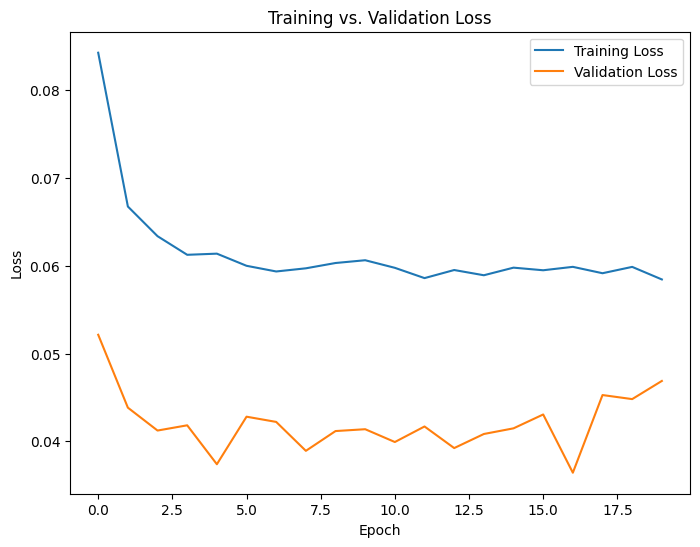

In [37]:
#Plot Training and Validation Loss Curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs. Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Evaluate the Model on the Test Set

In [38]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.0493
Test Accuracy: 0.9902


##### Save the model

In [40]:
model.save("neural_net_model.keras")